<a href="https://colab.research.google.com/github/vantuan5644/MachineLearningCourse/blob/master/Airline_Arrivals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Arrivals
- Description: Use a dataset consists of flights details to predict how late flights will be with assumption: A flight only counts as late if it is more than 30 minutes late
 - Dataset link: [RITA Flights](http://stat-computing.org/dataexpo/2009/the-data.html/)
- Data Exploration
- Model applying 
 - [x] Naive Bayes
 - [x] Decision Tree
 - [x] Random Forest
 - [ ] Gradient Boosting
 - [ ]  SVM

- Model comparisons, explainations and futher improvements

- Conclusions

## Import libraries and do data exploration




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
plt.style.use('seaborn-white')

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2008.csv')

In [0]:
# data = data.astype(int)
print(data.shape)
data.tail()

(7009728, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,N646DL,122.0,111.0,71.0,14.0,3.0,ATL,IAD,533,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,N908DL,167.0,168.0,139.0,-2.0,-1.0,ATL,SAT,874,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,N671DN,121.0,116.0,85.0,0.0,-5.0,PBI,ATL,545,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,N908DL,123.0,135.0,104.0,-5.0,7.0,SAT,ATL,874,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Data shape is (7009728, 29), that's quite big for a binary classification task. Let's dive more into the features


In [0]:
tab_info = pd.DataFrame(data.dtypes).T.rename(index={0: 'data_type'})
tab_info = tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0: 'null_values'}))
tab_info = tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0] * 100).T.rename(index={0: 'null_values (%)'}))
tab_info


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
data_type,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,int64,float64,float64,int64,object,int64,float64,float64,float64,float64,float64
null_values,0,0,0,0,136246,0,151649,0,0,0,83365,154699,844,154699,154699,136246,0,0,0,151649,137058,0,6872294,0,5484993,5484993,5484993,5484993,5484993
null_values (%),0,0,0,0,1.94367,0,2.16341,0,0,0,1.18928,2.20692,0.0120404,2.20692,2.20692,1.94367,0,0,0,2.16341,1.95525,0,98.0394,0,78.2483,78.2483,78.2483,78.2483,78.2483


There are some columns that have more than 50% is missing values. So basically we gotta remove those columns


In [0]:
percentage_nan = data.isnull().sum(axis=0) / data.shape[0] * 100
for col in data.columns:
  if percentage_nan[col] > 50:
    data = data.drop(col, axis=1)

In [0]:
data.corr()['ArrDelay'].sort_values(ascending=False)

ArrDelay             1.000000
DepDelay             0.931391
TaxiOut              0.322101
DepTime              0.178275
TaxiIn               0.123065
CRSDepTime           0.116894
CRSArrTime           0.113087
ActualElapsedTime    0.093925
ArrTime              0.066021
AirTime              0.034732
FlightNum            0.016603
CRSElapsedTime       0.012641
DayOfWeek            0.010558
Distance             0.006551
DayofMonth           0.001607
Month               -0.042058
Year                      NaN
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64

We can see that our target (ArrDelay) has very high correlation with DepDelay (0.93)


In [0]:
def delay_status(x):
  if isinstance(x, float) or isinstance(x, int):
    return 1 if x > 30 else 0
  return np.nan

Our label **delay_status** will be defined 1 if ArrDelay > 30 (mins)


In [0]:
data = data.drop(['Year', 'ArrTime', 'ActualElapsedTime', 'AirTime'], axis=1)
data['delay_status'] = data['ArrDelay'].apply(lambda x: delay_status(x))

**ArrTime, ActualElapsedTime, AirTime** columns should be removed from the data because "their appearance" are after the plane arrivals.

**Year** column should be removed too because we only use 2008's data

In [0]:
data.describe().round(2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,delay_status
count,7009728.00,7009728.00,7009728.00,6873482.00,7009728.00,7009728.00,7009728.00,7008884.00,6855029.00,6873482.00,7009728.00,6858079.00,6872670.00,7009728.00,7009728.00,7009728.00
mean,6.38,15.73,3.92,1333.83,1326.09,1494.80,2224.20,128.87,8.17,9.97,726.39,6.86,16.45,0.02,0.00,0.13
std,3.41,8.80,1.99,478.07,464.25,482.67,1961.72,69.41,38.50,35.31,562.10,4.93,11.33,0.14,0.05,0.33
min,1.00,1.00,1.00,1.00,0.00,0.00,1.00,-141.00,-519.00,-534.00,11.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,928.00,925.00,1115.00,622.00,80.00,-10.00,-4.00,325.00,4.00,10.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1325.00,1320.00,1517.00,1571.00,110.00,-2.00,-1.00,581.00,6.00,14.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1728.00,1715.00,1907.00,3518.00,159.00,12.00,8.00,954.00,8.00,19.00,0.00,0.00,0.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,9743.00,1435.00,2461.00,2467.00,4962.00,308.00,429.00,1.00,1.00,1.00


In [0]:
data[(data['Cancelled'] == 1)]['delay_status'].value_counts()

0    137434
Name: delay_status, dtype: int64

An intersting (and obviously) information is all **Canceled** flights will got no **delay**


In [0]:
data.describe(include='O')

,UniqueCarrier,TailNum,Origin,Dest
count,7009728,6926363,7009728,7009728
unique,20,5373,303,304
top,WN,N476HA,ATL,ATL
freq,1201754,4701,414513,414521


In [0]:
len(set(list(data['Origin'].unique()) + list(data['Dest'].unique())))

305

There is **20** different airlines and **305** different airports. We will figure out whether airlines or airport affect the delay status

In [0]:
data['CRSArrHour'] = data['CRSArrTime'] // 100
data['CRSDepHour'] = data['CRSDepTime'] // 100

Because CRSArriveTime is a categorical feature, we will use its hour values only


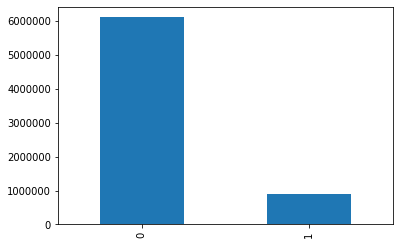

In [0]:
data['delay_status'].value_counts().plot(kind='bar')

We can see that there is a big gap between **Delay** and **Not delay** status (imbalanced data). 

We will try these steps one by one:
1. Use an algorithm that robust to imbalanced data (Decision Tree, Naive Bayes, kNN)

2. Adjust threshold in decision making (instead of 0.5)

3. Modify cost function 


# Further Data Exploration

In [0]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = data['ArrDelay'].groupby(data['UniqueCarrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
UniqueCarrier,,,,
AQ,-90.0,338.0,7752.0,-2.888674
HA,-519.0,1050.0,61212.0,1.264409
F9,-67.0,809.0,95384.0,6.108247
AS,-81.0,948.0,148492.0,4.804346
OH,-81.0,955.0,190695.0,11.817468
B6,-83.0,834.0,192114.0,11.084184
YV,-73.0,606.0,245131.0,11.775181
9E,-66.0,1143.0,254322.0,4.111135
FL,-86.0,1175.0,258713.0,9.091375


We can see the differences in Airlines Arrival Delay. But in the average, there is no airline has ArrDelay > 30 


In [0]:
carriers_stats = data.groupby(['UniqueCarrier']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
carriers_stats['delay_percentage'] = carriers_stats['delay_status', 'sum']/ data['delay_status'].sum() * 100
carriers_stats['delay_prob'] = carriers_stats['delay_status', 'sum']/ carriers_stats['delay_status', 'count']
carriers_stats.sort_values(by='delay_prob', ascending=False)

delay_status          delay_percentage delay_prob
                       sum    count                            
UniqueCarrier                                                  
AA                  100571   604885        11.157225   0.166265
B6                   32286   196091         3.581770   0.164648
UA                   73860   449515         8.193939   0.164310
OH                   31384   197607         3.481703   0.158820
CO                   44594   298455         4.947204   0.149416
YV                   37522   254930         4.162645   0.147186
XE                   55102   374510         6.112949   0.147131
EV                   41029   280575         4.551707   0.146232
MQ                   71675   490693         7.951538   0.146069
FL                   33238   261684         3.687383   0.127016
NW                   40830   347652         4.529631   0.117445
DL                   52391   451931         5.812194   0.115927
OO                   63840   567159         7.082332   0.112561
AS                   16017   151102         1.776907   0.106001
9E                   27083   262208         3.004555   0.103288
WN                  123840  1201754        13.738659   0.103049
US                   44706   453589         4.959629   0.098561
F9                    8797    95762         0.975929   0.091863
HA                    2463    61826         0.273242   0.039838
AQ                     170     7800         0.018860   0.021795

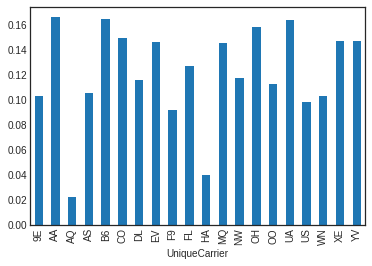

In [0]:
carriers_stats['delay_prob'].plot(kind='bar')

HA and AQ have least delay probability

In [0]:
monthly_stats = data.groupby(['Month']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
monthly_stats['delay_percentage'] = monthly_stats['delay_status', 'sum']/ data['delay_status'].sum() * 100
monthly_stats['delay_prob'] = monthly_stats['delay_status', 'sum']/ monthly_stats['delay_status', 'count']
monthly_stats.sort_values(by='delay_prob', ascending=False)

delay_status         delay_percentage delay_prob
               sum   count                            
Month                                                 
12          107454  544958        11.920816   0.197178
6           102801  608665        11.404618   0.168896
2            95490  569236        10.593545   0.167751
3            92673  616090        10.281030   0.150421
1            87294  605765         9.684290   0.144105
7            88001  627931         9.762724   0.140144
8            72698  612279         8.065028   0.118733
4            68034  598126         7.547609   0.113745
5            65824  606293         7.302435   0.108568
11           45517  523272         5.049601   0.086985
9            38598  540908         4.282015   0.071358
10           37014  556205         4.106288   0.066547

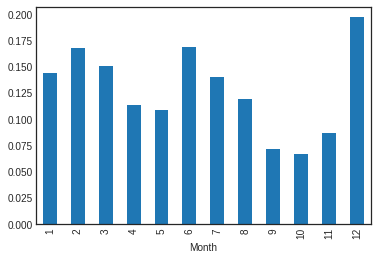

In [0]:
monthly_stats['delay_prob'].plot(kind='bar')

The delay probability is different for unique months, but the differences are not so clear like Carriers


In [0]:
depHourStats = data.groupby(['CRSDepHour']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
depHourStats['delay_percentage'] = depHourStats['delay_status', 'sum']/ data['delay_status'].sum() * 100
depHourStats['delay_prob'] = depHourStats['delay_status', 'sum']/ depHourStats['delay_status', 'count']
depHourStats = depHourStats.sort_values(by='CRSDepHour', ascending=False)

arrHourStats = data.groupby(['CRSArrHour']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
arrHourStats['delay_percentage'] = arrHourStats['delay_status', 'sum']/ data['delay_status'].sum() * 100
arrHourStats['delay_prob'] = arrHourStats['delay_status', 'sum']/ arrHourStats['delay_status', 'count']
arrHourStats = arrHourStats.sort_values(by='CRSArrHour', ascending=False)


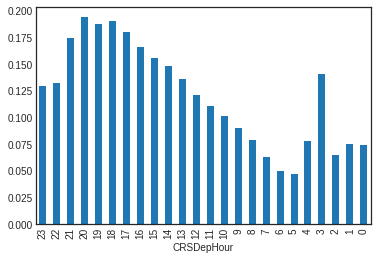

In [0]:
depHourStats['delay_prob'].plot(kind='bar')

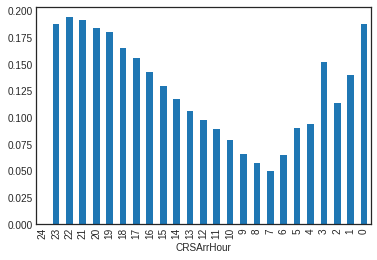

In [0]:
arrHourStats['delay_prob'].plot(kind='bar')

The flights that have DepartureTime = [5, 6] and the ones that have ArrivalHour at [6, 7, 8, 9] will have least probability to be delayed

In [0]:
weekly_stats = data.groupby(['DayOfWeek']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
weekly_stats['delay_percentage'] = weekly_stats['delay_status', 'sum']/ data['delay_status'].sum() * 100
weekly_stats['delay_prob'] = weekly_stats['delay_status', 'sum']/ weekly_stats['delay_status', 'count']
weekly_stats.sort_values(by='delay_prob', ascending=False)

delay_status          delay_percentage delay_prob
                   sum    count                            
DayOfWeek                                                  
5               156254  1035166        17.334629   0.150946
7               134765   976887        14.950666   0.137954
1               133241  1036201        14.781595   0.128586
4               132714  1032224        14.723130   0.128571
2               126602  1032049        14.045072   0.122671
3               120555  1039665        13.374225   0.115956
6                97267   857536        10.790683   0.113426

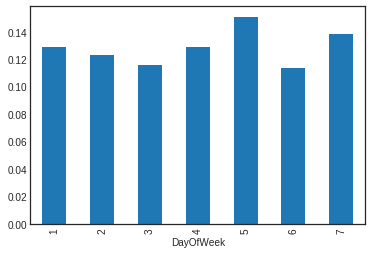

In [0]:
weekly_stats['delay_prob'].plot(kind='bar')

There is no significant difference between Days in the week

In [0]:
daily_stats = data.groupby(['DayofMonth']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
daily_stats['delay_percentage'] = daily_stats['delay_status', 'sum']/ data['delay_status'].sum() * 100
daily_stats['delay_prob'] = daily_stats['delay_status', 'sum']/ daily_stats['delay_status', 'count']
daily_stats.sort_values(by='delay_prob', ascending=False)

delay_status         delay_percentage delay_prob
                    sum   count                            
DayofMonth                                                 
31                20986  127968         2.328161   0.163994
22                35819  230557         3.973716   0.155359
27                32036  222876         3.554035   0.143739
21                33435  234533         3.709238   0.142560
4                 32500  228649         3.605511   0.142139
7                 32599  233797         3.616493   0.139433
1                 31712  229292         3.518091   0.138304
8                 31670  229578         3.513431   0.137949
26                30781  226590         3.414807   0.135844
15                30216  230379         3.352126   0.131158
20                30024  229165         3.330826   0.131015
10                30478  232989         3.381192   0.130813
6                 29711  228117         3.296102   0.130245
19                29627  227487         3.286783   0.130236
23                29234  229039         3.243184   0.127638
11                29309  233448         3.251505   0.125548
30                26569  211685         2.947533   0.125512
13                28392  227233         3.149774   0.124947
14                29240  234285         3.243850   0.124805
9                 28161  227064         3.124147   0.124022
2                 28611  230865         3.174070   0.123930
18                28920  234146         3.208350   0.123513
12                27338  227247         3.032845   0.120301
16                27537  229085         3.054921   0.120204
24                27504  229797         3.051260   0.119688
5                 27286  228156         3.027076   0.119594
17                27702  233202         3.073226   0.118790
28                26500  229613         2.939878   0.115412
25                26159  228095         2.902048   0.114685
3                 26468  233259         2.936328   0.113470
29                24874  231532         2.759491   0.107432

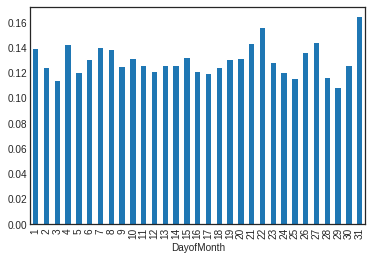

In [0]:
daily_stats['delay_prob'].plot(kind='bar')

Just like Days in the week, we can't just look at Days of Month and figure out whether the flight have a high probability to be delayed

**With different Airports (Origin / Dest)**

In [0]:
airports_stats = data.groupby(['Origin']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
airports_stats['delay_percentage'] = airports_stats['delay_status', 'sum']/ data['delay_status'].sum() * 100
airports_stats['delay_prob'] = airports_stats['delay_status', 'sum']/ airports_stats['delay_status', 'count']
airports_stats.sort_values(by='delay_prob', ascending=False)

delay_status       delay_percentage delay_prob
                sum count                            
Origin                                               
PUB               2     2         0.000222   1.000000
CEC             301  1063         0.033393   0.283161
AKN              30   116         0.003328   0.258621
OTH             131   515         0.014533   0.254369
ACK             116   457         0.012869   0.253829
...             ...   ...              ...        ...
PIH              44  1659         0.004881   0.026522
BLI               3   120         0.000333   0.025000
WYS               2   264         0.000222   0.007576
INL               0    72         0.000000   0.000000
TUP               0    10         0.000000   0.000000

[303 rows x 4 columns]

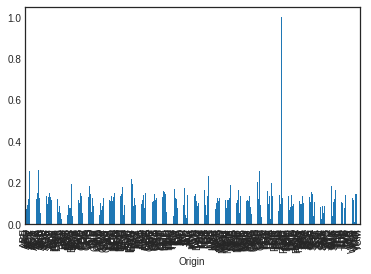

In [0]:
airports_stats['delay_prob'].plot(kind='bar')

There is one airport that always have delay flights: PUB

In [0]:
airports_stats = data.groupby(['Dest']).agg({'delay_status': [pd.Series.sum, pd.Series.count]})
airports_stats['delay_percentage'] = airports_stats['delay_status', 'sum']/ data['delay_status'].sum() * 100
airports_stats['delay_prob'] = airports_stats['delay_status', 'sum']/ airports_stats['delay_status', 'count']
airports_stats.sort_values(by='delay_prob', ascending=False)

delay_status         delay_percentage delay_prob
              sum   count                            
Dest                                                 
MQT           285     993         0.031618   0.287009
OTH           133     517         0.014755   0.257253
ACK           120     469         0.013313   0.255864
EWR         34469  138491         3.823949   0.248890
CIC           330    1392         0.036610   0.237069
...           ...     ...              ...        ...
IYK            25     954         0.002773   0.026205
BLI             2     121         0.000222   0.016529
OGD             0       2         0.000000   0.000000
CYS             0       2         0.000000   0.000000
TUP             0       9         0.000000   0.000000

[304 rows x 4 columns]

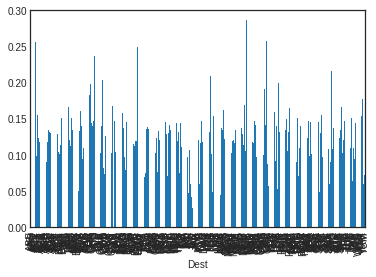

In [0]:
airports_stats['delay_prob'].plot(kind='bar')

There are diferences between the Airports

# Model Training

Because of data is imbalanced, thus we will interpret the models that robust to imbalanced problem first. Those are **Decision Tree, Naive Bayes**

In [0]:
def delay_status(x):
  if isinstance(x, float) or isinstance(x, int):
    return 1 if x > 30 else 0
  return np.nan

data = data.drop(['Year', 'ArrTime', 'ActualElapsedTime', 'AirTime'], axis=1)
data['delay_status'] = data['ArrDelay'].apply(lambda x: delay_status(x))

data['CRSArrHour'] = data['CRSArrTime'] // 100
data['CRSDepHour'] = data['CRSDepTime'] // 100



In [0]:
numeric_cols = ['CRSElapsedTime', 'DepDelay', 
                'Distance', 'TaxiIn', 'TaxiOut']
                
categorical_cols = ['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth',
                    'DayOfWeek', 'Cancelled', 'Diverted', 'CRSArrHour', 'CRSDepHour']

label = ['delay_status']

## Decision Tree
- Pros: 
  - Non-parametric supervised learning method used for **classification** and **regression**
  - Simple to understand and to interpret. Trees can be visualed
  - Requires little data preparation (normalization, one-hot-encode, remove null values) -> able to handle both *numerical* and *categorical* data
  - Able to handle multi-output problems
  - **White-box** model (explainable by boolean logic) and validable using statistical tests
  - Performs well even if its assumptions are somewhat violated by the true model from which the data were generated

- Cons:
  - Over-complex tree (overfitting). Can be avoided by **pruning** (setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree)
  - Unstable because small variations in the data might result in a completely different tree. Can be avoided by using DT **within an ensemble**
  - Decision tree learners create biased trees if some classes dominate. It is therefore recommended to **balance the dataset prior to fitting with the decision tree**
  - There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems
  - Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree


  

### Decision Tree (n_samples = 1M) with one-hot-encoded categorical columns
F1-Score = 0.8468703185045269



In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
train_df = data[categorical_cols + numeric_cols + label]
train_df = train_df.dropna(subset=['delay_status'])

In [0]:
# train_df_subset = train_df.sample(frac=0.5, replace=False)
train_df_subset = train_df.sample(n=1000000, replace=False, random_state=90)


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 16)


,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status
3309261,DL,BOS,ATL,6,27,5,0,0,19,16,175.0,128.0,946,9.0,45.0,1
5676471,DL,ATL,PBI,10,25,6,0,0,15,13,106.0,-2.0,545,5.0,20.0,0
3960943,F9,SNA,DEN,7,3,4,0,0,13,10,133.0,3.0,846,11.0,16.0,0
3388422,MQ,DFW,XNA,6,27,5,0,0,22,21,65.0,19.0,281,2.0,10.0,0
1627148,NW,ORD,DTW,3,19,3,0,0,21,19,75.0,-1.0,235,12.0,29.0,0


In [0]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_df_subset[numeric_cols] = imp.fit_transform(train_df_subset[numeric_cols])

In [0]:
# One-hot-encoding the categorical features
train_df_subset = pd.get_dummies(train_df_subset, columns=categorical_cols, prefix=categorical_cols, dummy_na=True, drop_first=True)

In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

We will split training data by using Holdout with train/test ratio = 75/25

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 90)


In [0]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=90, splitter='best')

In [0]:
from sklearn.metrics import f1_score
y_true = y_test.values
y_pred = clf.predict(X_test)
f1_score(y_true, y_pred, average='binary')

0.8468703185045269

In [0]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances.sort_values('importance',ascending=False)

,feature,importance
1,DepDelay,0.918
4,TaxiOut,0.076
682,Diverted_1.0,0.006
492,Dest_LMT,0.000
483,Dest_LAX,0.000
...,...,...
246,Origin_PIH,0.000
247,Origin_PIR,0.000
248,Origin_PIT,0.000
249,Origin_PLN,0.000


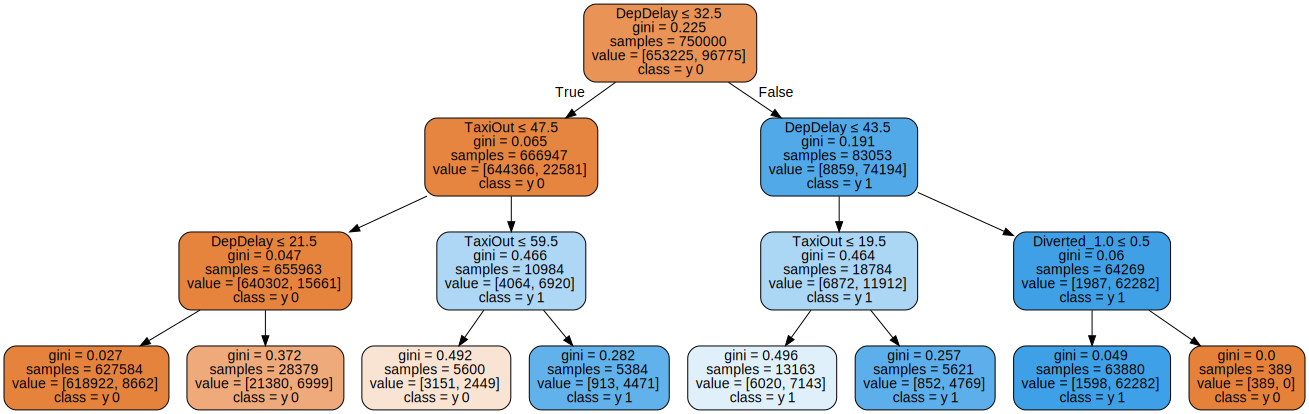

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=True,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Decision Tree (n_samples = 1M) with numeric columns only
F1_score = 0.8452187479685367

In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
train_df = data[numeric_cols + label]
train_df = train_df.dropna(subset=['delay_status'])

In [0]:
# train_df_subset = train_df.sample(frac=0.5, replace=False)
train_df_subset = train_df.sample(n=1000000, replace=False, random_state=90)


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 6)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status
3309261,175.0,128.0,946,9.0,45.0,1
5676471,106.0,-2.0,545,5.0,20.0,0
3960943,133.0,3.0,846,11.0,16.0,0
3388422,65.0,19.0,281,2.0,10.0,0
1627148,75.0,-1.0,235,12.0,29.0,0


In [0]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_df_subset[numeric_cols] = imp.fit_transform(train_df_subset[numeric_cols])

In [0]:
# One-hot-encoding the categorical features
# train_df_subset = pd.get_dummies(train_df_subset, columns=categorical_cols, prefix=categorical_cols, dummy_na=True, drop_first=True)

In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 6)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status
3309261,175.0,128.0,946.0,9.0,45.0,1
5676471,106.0,-2.0,545.0,5.0,20.0,0
3960943,133.0,3.0,846.0,11.0,16.0,0
3388422,65.0,19.0,281.0,2.0,10.0,0
1627148,75.0,-1.0,235.0,12.0,29.0,0


We will split training data by using Holdout with train/test ratio = 75/25

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 90)


In [0]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=90, splitter='best')

In [0]:
from sklearn.metrics import f1_score
y_true = y_test.values
y_pred = clf.predict(X_test)
f1_score(y_true, y_pred, average='binary')

0.8452187479685367

In [0]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances.sort_values('importance',ascending=False)

,feature,importance
1,DepDelay,0.924
4,TaxiOut,0.076
0,CRSElapsedTime,0.000
2,Distance,0.000
3,TaxiIn,0.000


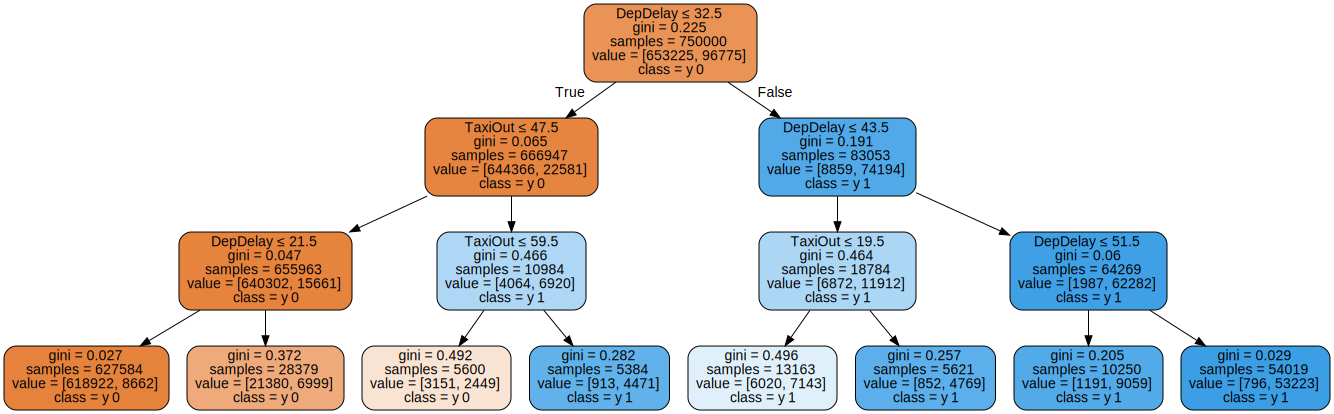

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=numeric_cols,  
                     class_names=True,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Decision Tree (n_samples = 1M) with LabelEncoder and GridSearchCV Hyperparam Tuning

'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 1

F1_score = 0.8645357686453577


The accepted answer for this question is misleading.

As it stands, sklearn decision trees do not handle categorical data - see issue #5442.

The recommended approach of using Label Encoding converts to integers which the DecisionTreeClassifier() will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense.

Using a OneHotEncoder is the only current valid way, allowing arbitrary splits not dependent on the label ordering, but is computationally expensive.

In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
numeric_cols = ['CRSElapsedTime', 'DepDelay', 
                'Distance', 'TaxiIn', 'TaxiOut']
                
categorical_cols = ['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth',
                    'DayOfWeek', 'Cancelled', 'Diverted', 'CRSArrHour', 'CRSDepHour']

label = ['delay_status']

In [0]:
train_df = data[numeric_cols + categorical_cols + label]
train_df = train_df.dropna(subset=['delay_status'])

In [0]:
# train_df_subset = train_df.sample(frac=0.5, replace=False)
train_df_subset = train_df.sample(n=1000000, replace=False, random_state=90)


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 16)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,delay_status
3309261,175.0,128.0,946,9.0,45.0,DL,BOS,ATL,6,27,5,0,0,19,16,1
5676471,106.0,-2.0,545,5.0,20.0,DL,ATL,PBI,10,25,6,0,0,15,13,0
3960943,133.0,3.0,846,11.0,16.0,F9,SNA,DEN,7,3,4,0,0,13,10,0
3388422,65.0,19.0,281,2.0,10.0,MQ,DFW,XNA,6,27,5,0,0,22,21,0
1627148,75.0,-1.0,235,12.0,29.0,NW,ORD,DTW,3,19,3,0,0,21,19,0


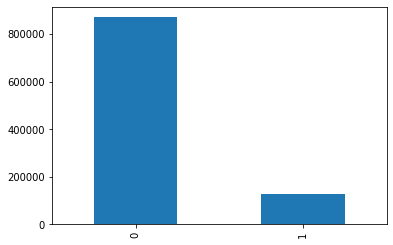

In [0]:
train_df_subset['delay_status'].value_counts().plot(kind='bar')

In [0]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_df_subset[numeric_cols] = imp.fit_transform(train_df_subset[numeric_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Label encoding object columns 
mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i, col in enumerate(train_df_subset):
    if train_df_subset[col].dtype == 'object':
        train_df_subset[col] = label_encoder.fit_transform(np.array(train_df_subset[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 16)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,delay_status
3309261,175.0,128.0,946.0,9.0,45.0,6,37,18,6,27,5,0,0,19,16,1
5676471,106.0,-2.0,545.0,5.0,20.0,6,18,216,10,25,6,0,0,15,13,0
3960943,133.0,3.0,846.0,11.0,16.0,8,270,80,7,3,4,0,0,13,10,0
3388422,65.0,19.0,281.0,2.0,10.0,11,81,299,6,27,5,0,0,22,21,0
1627148,75.0,-1.0,235.0,12.0,29.0,12,210,87,3,19,3,0,0,21,19,0


We will split training data by using Holdout with train/test ratio = 75/25

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


In [0]:
f1_scorer = make_scorer(f1_score, greater_is_better=True)
pipe_tree = make_pipeline(tree.DecisionTreeClassifier(random_state=1))


In [0]:
criterions = ['gini', 'entropy']
depths = np.arange(1, 5)
num_leafs = [1, 5]
param_grid = [{'decisiontreeclassifier__criterion': criterions,
               'decisiontreeclassifier__max_depth': depths,
               'decisiontreeclassifier__min_samples_leaf': num_leafs}]


In [0]:
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=f1_scorer, cv=10)
gs = gs.fit(X_train, y_train)


In [0]:
print(gs.best_params_)
best_tree_model = gs.best_estimator_


{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 1}


In [0]:
from sklearn.metrics import f1_score
y_true = y_test.values
y_pred = best_tree_model.predict(X_test)
f1_score(y_true, y_pred, average='binary')

0.8645357686453577

## Naive Bayes Classifier
- Bernuli NB 
  - F1_score = 0.42063109619315064
  - Reason?
  - **It assumes that all our features are binary**
- Gaussian NB
  - F1_score = 0.2927869326394912
  - Reason?
  - The assumption of the **normal distribution**. GNB is used in cases when all our features are continuos. We can't represent features in terms of their occurences
- Multinomial Naive Bayes
 - It is used when we have **discrete data** (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
numeric_cols = ['CRSElapsedTime', 'DepDelay', 
                'Distance', 'TaxiIn', 'TaxiOut']
                
categorical_cols = ['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth',
                    'DayOfWeek', 'Cancelled', 'Diverted', 'CRSArrHour', 'CRSDepHour']

label = ['delay_status']

In [0]:
train_df = data[numeric_cols + categorical_cols + label]
train_df = train_df.dropna(subset=['delay_status'])

In [0]:
# train_df_subset = train_df.sample(frac=0.5, replace=False)
train_df_subset = train_df.sample(n=1000000, replace=False, random_state=90)


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 16)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,delay_status
3309261,175.0,128.0,946,9.0,45.0,DL,BOS,ATL,6,27,5,0,0,19,16,1
5676471,106.0,-2.0,545,5.0,20.0,DL,ATL,PBI,10,25,6,0,0,15,13,0
3960943,133.0,3.0,846,11.0,16.0,F9,SNA,DEN,7,3,4,0,0,13,10,0
3388422,65.0,19.0,281,2.0,10.0,MQ,DFW,XNA,6,27,5,0,0,22,21,0
1627148,75.0,-1.0,235,12.0,29.0,NW,ORD,DTW,3,19,3,0,0,21,19,0


In [0]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_df_subset[numeric_cols] = imp.fit_transform(train_df_subset[numeric_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# One-hot-encoding the categorical features
train_df_subset = pd.get_dummies(train_df_subset, columns=categorical_cols, prefix=categorical_cols, dummy_na=True, drop_first=True)

In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,...,CRSArrHour_10.0,CRSArrHour_11.0,CRSArrHour_12.0,CRSArrHour_13.0,CRSArrHour_14.0,CRSArrHour_15.0,CRSArrHour_16.0,CRSArrHour_17.0,CRSArrHour_18.0,CRSArrHour_19.0,CRSArrHour_20.0,CRSArrHour_21.0,CRSArrHour_22.0,CRSArrHour_23.0,CRSArrHour_24.0,CRSArrHour_nan,CRSDepHour_1.0,CRSDepHour_2.0,CRSDepHour_3.0,CRSDepHour_4.0,CRSDepHour_5.0,CRSDepHour_6.0,CRSDepHour_7.0,CRSDepHour_8.0,CRSDepHour_9.0,CRSDepHour_10.0,CRSDepHour_11.0,CRSDepHour_12.0,CRSDepHour_13.0,CRSDepHour_14.0,CRSDepHour_15.0,CRSDepHour_16.0,CRSDepHour_17.0,CRSDepHour_18.0,CRSDepHour_19.0,CRSDepHour_20.0,CRSDepHour_21.0,CRSDepHour_22.0,CRSDepHour_23.0,CRSDepHour_nan
3309261,175.0,128.0,946.0,9.0,45.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5676471,106.0,-2.0,545.0,5.0,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3960943,133.0,3.0,846.0,11.0,16.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3388422,65.0,19.0,281.0,2.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1627148,75.0,-1.0,235.0,12.0,29.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


We will split training data by using Holdout with train/test ratio = 75/25

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.metrics import f1_score
y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

F1_score = 0.2927869326394912


In [0]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
from sklearn.metrics import f1_score
y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

F1_score = 0.42063109619315064


## Logistic Regression 
(withould threshold tuning and no-undersampling)

F1_score = 0.8682598979922556 (C=1.0, no C tuning)

F1_score = 0.9005791505791504 (C=100.0, with C tuning)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
numeric_cols = ['CRSElapsedTime', 'DepDelay', 
                'Distance', 'TaxiIn', 'TaxiOut']
                
categorical_cols = ['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth',
                    'DayOfWeek', 'Cancelled', 'Diverted', 'CRSArrHour', 'CRSDepHour']

label = ['delay_status']

In [0]:
train_df = data[numeric_cols + categorical_cols + label]
train_df = train_df.dropna(subset=['delay_status'])

In [0]:
# train_df_subset = train_df.sample(frac=0.5, replace=False)
train_df_subset = train_df.sample(n=1000000, replace=False, random_state=90)


In [12]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 16)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,delay_status
3309261,175.0,128.0,946,9.0,45.0,DL,BOS,ATL,6,27,5,0,0,19,16,1
5676471,106.0,-2.0,545,5.0,20.0,DL,ATL,PBI,10,25,6,0,0,15,13,0
3960943,133.0,3.0,846,11.0,16.0,F9,SNA,DEN,7,3,4,0,0,13,10,0
3388422,65.0,19.0,281,2.0,10.0,MQ,DFW,XNA,6,27,5,0,0,22,21,0
1627148,75.0,-1.0,235,12.0,29.0,NW,ORD,DTW,3,19,3,0,0,21,19,0


In [13]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_df_subset[numeric_cols] = imp.fit_transform(train_df_subset[numeric_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# One-hot-encoding the categorical features
train_df_subset = pd.get_dummies(train_df_subset, columns=categorical_cols, prefix=categorical_cols, dummy_na=True, drop_first=True)

In [15]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))

X = min_max_scaler.fit_transform(X)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [19]:
print(X_train.shape)

(750000, 733)


#### Get a smaller subset of data (100k rows) to tune the model with GridSearchCV


In [0]:
train_df.head()

,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,delay_status
0,150.0,8.0,810,4.0,8.0,WN,IAD,TPA,1,3,4,0,0,22,19,0
1,145.0,19.0,810,5.0,10.0,WN,IAD,TPA,1,3,4,0,0,10,7,0
2,90.0,8.0,515,3.0,17.0,WN,IND,BWI,1,3,4,0,0,7,6,0
3,90.0,-4.0,515,3.0,7.0,WN,IND,BWI,1,3,4,0,0,11,9,0
4,90.0,34.0,515,3.0,10.0,WN,IND,BWI,1,3,4,0,0,19,17,1


In [0]:
# train_df_subset = train_df.sample(frac=0.5, replace=False)
train_df_subset_smaller = train_df.sample(n=100000, replace=False, random_state=90)


In [21]:
print(train_df_subset_smaller.shape)
train_df_subset_smaller.head()

(100000, 16)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,Cancelled,Diverted,CRSArrHour,CRSDepHour,delay_status
3309261,175.0,128.0,946,9.0,45.0,DL,BOS,ATL,6,27,5,0,0,19,16,1
5676471,106.0,-2.0,545,5.0,20.0,DL,ATL,PBI,10,25,6,0,0,15,13,0
3960943,133.0,3.0,846,11.0,16.0,F9,SNA,DEN,7,3,4,0,0,13,10,0
3388422,65.0,19.0,281,2.0,10.0,MQ,DFW,XNA,6,27,5,0,0,22,21,0
1627148,75.0,-1.0,235,12.0,29.0,NW,ORD,DTW,3,19,3,0,0,21,19,0


In [22]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_df_subset_smaller[numeric_cols] = imp.fit_transform(train_df_subset_smaller[numeric_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
# One-hot-encoding the categorical features
train_df_subset_smaller = pd.get_dummies(train_df_subset_smaller, columns=categorical_cols, prefix=categorical_cols, dummy_na=True, drop_first=True)
print(train_df_subset_smaller.shape)

(100000, 725)


In [0]:
X = train_df_subset_smaller.drop(label[0], axis=1)
y = train_df_subset_smaller[label]

In [0]:
print(X.shape)

(100000, 724)


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))

X = min_max_scaler.fit_transform(X)


In [0]:
print(X.shape)
print(y.shape)

(100000, 724)
(100000, 1)


In [0]:
np.logspace(-2, 2, 5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C": np.logspace(-2, 2, 5),
      "penalty": ["l2"],
      "solver": ["saga"],
      }
# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10, scoring='f1', verbose=1)
logreg_cv.fit(X, y)

print("Tuned hpyerparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 30.8min finished


Tuned hpyerparameters (best parameters): {'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.8890745885503164


In [0]:
clf = logreg_cv.best_estimator_
clf.fit(X_train, y_train)
from sklearn.metrics import f1_score

y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

F1_score = 0.9005791505791504


#### Double check the class balance in train / test set`

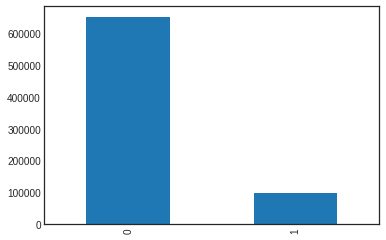

In [0]:
y_train['delay_status'].value_counts().plot(kind='bar')

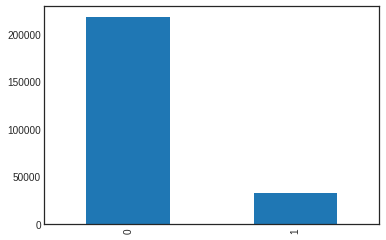

In [0]:
y_test['delay_status'].value_counts().plot(kind='bar')

## Random Forest

What's Random Forest?

RandomForest consists a large number of individual decision trees that operate as an **ensemble**. Each individual tree in the RF spits out a class prediction and **the class with the most votes** becomes our model's prediction

*A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual consituent models* because **the trees protect each other from their individual errors**

**Help reduce variance and robust to overfitting**



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


#### Random Forest with Hyperparameters Tuning

We will try to adjust the following set of hyperparameters:

 - n_estimators = number of trees in the foreset
 - max_features = max number of features considered for splitting a node
 - max_depth = max number of levels in each decision tree
 - min_samples_split = min number of data points placed in a node before the node is split
 - min_samples_leaf = min number of data points allowed in a leaf node
 - bootstrap = method for sampling data points (with or without replacement)


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
train_df_subset_smaller = train_df_subset.sample(n=100000, replace=False, random_state=90)
print(train_df_subset_smaller.shape)
train_df_subset_smaller.head()

(100000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset_smaller.drop(label[0], axis=1)
y = train_df_subset_smaller[label]

In [0]:
print(X.shape)

(100000, 733)


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))

X = min_max_scaler.fit_transform(X)


In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [100, 200, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='f1')

In [0]:
grid_search.fit(X, y)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 13.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 90, 'n_estimators': 1000}
0.8816547433604839


In [0]:
clf = RandomForestClassifier(bootstrap=True, 
                             max_depth=90,
                             n_estimators=1000)
clf.fit(X_train, y_train)
from sklearn.metrics import f1_score

y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

#### Without GridSearchCV

In [0]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
from sklearn.metrics import f1_score

y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

F1_score = 0.8547250121973788


## Gradient Boosting


**Boosting** is once again an ensemble technique, but the predictors are not made independently but sequentially

**Redue bias & variance but can be overfitted**

**Gradient Boosting** 
 - Use a simple regression model to start
 - Subsequent models predict the error residual of the previous predictions
 - Overall prediction given by a weighted sum of the collection 

 - Futher more explaination: GB is called like that because its related to gradient descent sort of procedure
  - make a prediction y_hat
  - Calculate the error term 
  
  J = sum(y_i - y_hat_i)^2
  - If we adjust y_hat like this:

  y_hat = h_hat + alpha * gradient
  
    - Fitting a model to the residuals just like fitting one to the gradient function (with MSE)


In [0]:
from sklearn.ensemble import GradientBoostingClassifier


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
train_df_subset_smaller = train_df_subset.sample(n=100000, replace=False, random_state=90)
print(train_df_subset_smaller.shape)
train_df_subset_smaller.head()

(100000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset_smaller.drop(label[0], axis=1)
y = train_df_subset_smaller[label]

In [0]:
print(X.shape)

(100000, 733)


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))

X = min_max_scaler.fit_transform(X)


In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 500]
}
# Create a based model
gb = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 2, scoring='f1')
grid_search.fit(X, y)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [0]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 90, 'n_estimators': 1000}
0.8816547433604839


In [0]:
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
from sklearn.metrics import f1_score

y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

#### Without GridSearchCV

In [0]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
from sklearn.metrics import f1_score

y_true = y_test.values
y_pred = clf.predict(X_test)
print('F1_score =', f1_score(y_true, y_pred, average='binary'))

F1_score = 0.8840846069516992


## SVM

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [0]:
from sklearn.svm import SVC


In [0]:
print(train_df_subset.shape)
train_df_subset.head()

(1000000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset.drop(label[0], axis=1)
y = train_df_subset[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [0]:
train_df_subset_smaller = train_df_subset.sample(n=100000, replace=False, random_state=90)
print(train_df_subset_smaller.shape)
train_df_subset_smaller.head()

(100000, 734)


,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,delay_status,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_nan,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,...,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest

In [0]:
X = train_df_subset_smaller.drop(label[0], axis=1)
y = train_df_subset_smaller[label]

In [28]:
print(X.shape)

(100000, 724)


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))

X = min_max_scaler.fit_transform(X)


In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1],
}
# Create a based model
svc = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, scoring='f1')
grid_search.fit(X, y)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [0]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 90, 'n_estimators': 1000}
0.8816547433604839


# Conclusions:
With our data
1. Decision Tree
 - Acceptable performance, low training-time
 - There is no sighly difference between categorical encoding methods (one-hot-encode, label encoding or even remove them)
 - Maybe we have a much powerful feature in the training data: DepDelay
2. Naive Bayes
 - Not effective 
 - Our data's important features is numeric
3. Logistic Regression
 - Performed well although the training data is unbalanced
 - The reason is the same as DT, maybe we have a much powerful feature in the training data: DepDelay
4. Random Forest
  
5. Gradient Boosting

6. SVM

